In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
%matplotlib inline

# Import data
* This is the combined results, candidate features, and county features
* Created from data_processing notebook

In [3]:
combined_results = 'combined_results_supertues.csv'
data = pd.read_csv(combined_results)

data

last name  votes state  winner  percent_votes  winner_state   fips  \
0        Biden   1864    AL       1       0.867784             1   1131   
1        Biden   1109    AL       1       0.876680             1   1129   
2        Biden   1390    AL       1       0.720954             1   1127   
3        Biden  11825    AL       1       0.769006             1   1125   
4        Biden   1762    AL       1       0.853682             1   1123   
...        ...    ...   ...     ...            ...           ...    ...   
3185   Sanders   4075    WA       0       0.462963             0  53007   
3186   Sanders   6911    WA       0       0.448330             0  53005   
3187   Sanders    705    WA       0       0.386725             0  53003   
3188   Sanders    288    WA       1       0.503497             0  53001   
3189   Sanders   7682    ND       1       0.572259             1  38000   

                 county  PST045214  PST040210  ...  carbon_tax  \
0         Wilcox County      11098      11665  ...         1.0   
1     Washington County      16834      17583  ...         1.0   
2         Walker County      65471      67023  ...         1.0   
3     Tuscaloosa County     202212     194653  ...         1.0   
4     Tallapoosa County      41165      41618  ...         1.0   
...                 ...        ...        ...  ...         ...   
3185      Chelan County      74588      72456  ...         0.0   
3186      Benton County     186486     175177  ...         0.0   
3187      Asotin County      22189      21623  ...         0.0   
3188       Adams County      19179      18728  ...         0.0   
3189       North Dakota     739482     672591  ...         0.0   

      north_korea_meet  free_college  children_public  ban_fracking  \
0                  0.0           0.0              0.0           0.0   
1                  0.0           0.0              0.0           0.0   
2                  0.0           0.0              0.0           0.0   
3                  0.0           0.0              0.0           0.0   
4                  0.0           0.0              0.0           0.0   
...                ...           ...              ...           ...   
3185               1.0           1.0              1.0           1.0   
3186               1.0           1.0              1.0           1.0   
3187               1.0           1.0              1.0           1.0   
3188               1.0           1.0              1.0           1.0   
3189               1.0           1.0              1.0           1.0   

      border_crossing_penalties  medicare_for_all  private_insurance  \
0                           1.0               0.0                0.0   
1                           1.0               0.0                0.0   
2                           1.0               0.0                0.0   
3                           1.0               0.0                0.0   
4                           1.0               0.0                0.0   
...                         ...               ...                ...   
3185                        0.0               1.0                1.0   
3186                        0.0               1.0                1.0   
3187                        0.0               1.0                1.0   
3188                        0.0               1.0                1.0   
3189                        0.0               1.0                1.0   

      eliminate_electoral_college  eliminate_filibuster  
0                             0.0                   0.0  
1                             0.0                   0.0  
2                             0.0                   0.0  
3                             0.0                   0.0  
4                             0.0                   0.0  
...                           ...                   ...  
3185                          1.0                   1.0  
3186                          1.0                   1.0  
3187                          1.0                   1.0  
3188         

# Select Columns for Training
* votes, state, winner, and percent_votes will be dropped later

In [4]:
training_data = data.drop(['Gender','last name', 'fips', 'county', 'winner_state'], axis=1)
training_data.head()

votes state  winner  percent_votes  PST045214  PST040210  PST120214  \
0   1864    AL       1       0.867784      11098      11665       -4.9   
1   1109    AL       1       0.876680      16834      17583       -4.3   
2   1390    AL       1       0.720954      65471      67023       -2.3   
3  11825    AL       1       0.769006     202212     194653        3.9   
4   1762    AL       1       0.853682      41165      41618       -1.1   

   POP010210  AGE135214  AGE295214  ...  carbon_tax  north_korea_meet  \
0      11670        5.7       24.8  ...         1.0               0.0   
1      17581        4.9       22.5  ...         1.0               0.0   
2      67023        5.8       22.1  ...         1.0               0.0   
3     194656        6.0       21.1  ...         1.0               0.0   
4      41616        5.8       21.1  ...         1.0               0.0   

   free_college  children_public  ban_fracking  border_crossing_penalties  \
0           0.0              0.0           0.0                        1.0   
1           0.0              0.0           0.0                        1.0   
2           0.0              0.0           0.0                        1.0   
3           0.0              0.0           0.0                        1.0   
4           0.0              0.0           0.0                        1.0   

   medicare_for_all  private_insurance  eliminate_electoral_college  \
0               0.0                0.0                          0.0   
1               0.0                0.0                          0.0   
2               0.0                0.0                          0.0   
3               0.0                0.0                          0.0   
4               0.0                0.0                          0.0   

   eliminate_filibuster  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  

[5 rows x 83 columns]

# Exploratory Analysis

In [5]:
training_data.columns

Index(['votes', 'state', 'winner', 'percent_votes', 'PST045214', 'PST040210',
       'PST120214', 'POP010210', 'AGE135214', 'AGE295214', 'AGE775214',
       'SEX255214', 'RHI125214', 'RHI225214', 'RHI325214', 'RHI425214',
       'RHI525214', 'RHI625214', 'RHI725214', 'RHI825214', 'POP715213',
       'POP645213', 'POP815213', 'EDU635213', 'EDU685213', 'VET605213',
       'LFE305213', 'HSG010214', 'HSG445213', 'HSG096213', 'HSG495213',
       'HSD410213', 'HSD310213', 'INC910213', 'INC110213', 'PVY020213',
       'BZA010213', 'BZA110213', 'BZA115213', 'NES010213', 'SBO001207',
       'SBO315207', 'SBO115207', 'SBO215207', 'SBO515207', 'SBO415207',
       'SBO015207', 'MAN450207', 'WTN220207', 'RTN130207', 'RTN131207',
       'AFN120207', 'BPS030214', 'LND110210', 'POP060210', 'Age', 'Net Worth',
       '% Donations Under $200', 'Candidate Committee Money', 'Outside Money',
       'Twitter Followers', 'legalize_cannabis', 'vote_incarcerated',
       'gun_licenses', 'tax_wealthy_assets', '

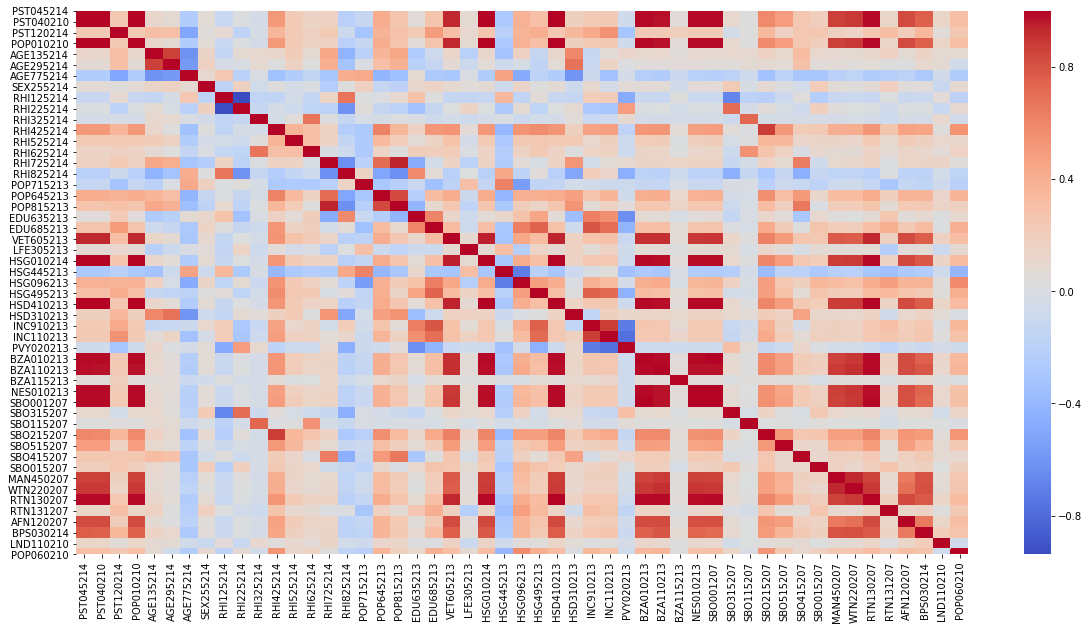

In [6]:
plt.figure(figsize=(20,10))

sns.heatmap(training_data[['PST045214', 'PST040210', 'PST120214',
       'POP010210', 'AGE135214', 'AGE295214', 'AGE775214', 'SEX255214',
       'RHI125214', 'RHI225214', 'RHI325214', 'RHI425214', 'RHI525214',
       'RHI625214', 'RHI725214', 'RHI825214', 'POP715213', 'POP645213',
       'POP815213', 'EDU635213', 'EDU685213', 'VET605213', 'LFE305213',
       'HSG010214', 'HSG445213', 'HSG096213', 'HSG495213', 'HSD410213',
       'HSD310213', 'INC910213', 'INC110213', 'PVY020213', 'BZA010213',
       'BZA110213', 'BZA115213', 'NES010213', 'SBO001207', 'SBO315207',
       'SBO115207', 'SBO215207', 'SBO515207', 'SBO415207', 'SBO015207',
       'MAN450207', 'WTN220207', 'RTN130207', 'RTN131207', 'AFN120207',
       'BPS030214', 'LND110210', 'POP060210']].corr(), cmap='coolwarm')

## Sanders percent vote demographic features heat map

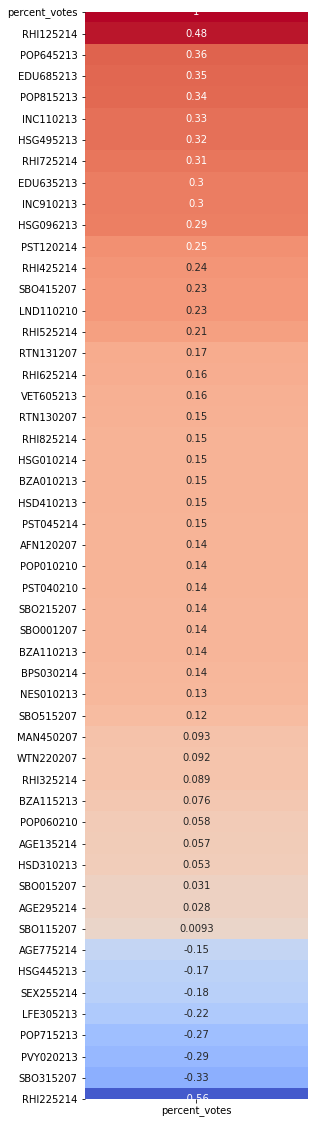

In [7]:
def heatmap_numeric_w_dependent_variable(df, dependent_variable):
    '''
    Takes df, a dependant variable as str
    Returns a heatmap of all independent variables' correlations with dependent variable 
    '''
    plt.figure(figsize=(4, 20))
    g = sns.heatmap(df.corr()[[dependent_variable]].sort_values(ascending=False, by=dependent_variable), 
                    annot=True, 
                    cmap='coolwarm', 
                    vmin=-0.6,
                    vmax=0.5,
                    cbar=False) 
    return g

sanders_df = data[data['last name'] == 'Sanders']


heatmap_numeric_w_dependent_variable(sanders_df[['percent_votes', 'PST045214', 'PST040210', 'PST120214',
       'POP010210', 'AGE135214', 'AGE295214', 'AGE775214', 'SEX255214',
       'RHI125214', 'RHI225214', 'RHI325214', 'RHI425214', 'RHI525214',
       'RHI625214', 'RHI725214', 'RHI825214', 'POP715213', 'POP645213',
       'POP815213', 'EDU635213', 'EDU685213', 'VET605213', 'LFE305213',
       'HSG010214', 'HSG445213', 'HSG096213', 'HSG495213', 'HSD410213',
       'HSD310213', 'INC910213', 'INC110213', 'PVY020213', 'BZA010213',
       'BZA110213', 'BZA115213', 'NES010213', 'SBO001207', 'SBO315207',
       'SBO115207', 'SBO215207', 'SBO515207', 'SBO415207', 'SBO015207',
       'MAN450207', 'WTN220207', 'RTN130207', 'RTN131207', 'AFN120207',
       'BPS030214', 'LND110210', 'POP060210']], 'percent_votes')

## Biden percent vote demographic features heat map

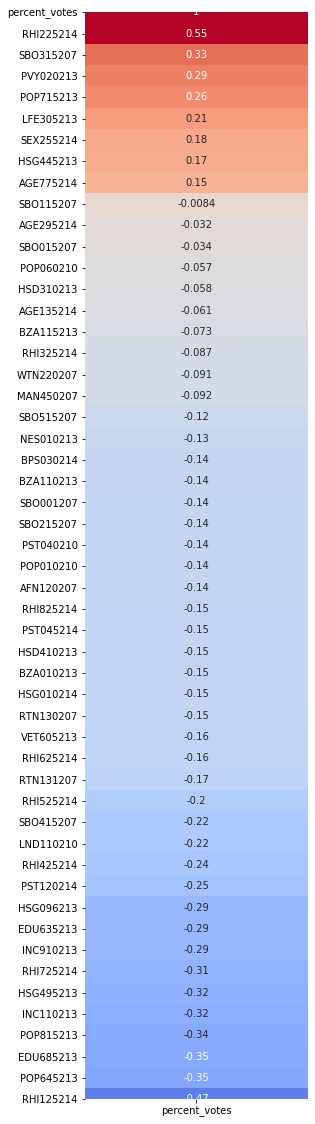

In [8]:
biden_df = data[data['last name'] == 'Biden']

heatmap_numeric_w_dependent_variable(biden_df[['percent_votes', 'PST045214', 'PST040210', 'PST120214',
       'POP010210', 'AGE135214', 'AGE295214', 'AGE775214', 'SEX255214',
       'RHI125214', 'RHI225214', 'RHI325214', 'RHI425214', 'RHI525214',
       'RHI625214', 'RHI725214', 'RHI825214', 'POP715213', 'POP645213',
       'POP815213', 'EDU635213', 'EDU685213', 'VET605213', 'LFE305213',
       'HSG010214', 'HSG445213', 'HSG096213', 'HSG495213', 'HSD410213',
       'HSD310213', 'INC910213', 'INC110213', 'PVY020213', 'BZA010213',
       'BZA110213', 'BZA115213', 'NES010213', 'SBO001207', 'SBO315207',
       'SBO115207', 'SBO215207', 'SBO515207', 'SBO415207', 'SBO015207',
       'MAN450207', 'WTN220207', 'RTN130207', 'RTN131207', 'AFN120207',
       'BPS030214', 'LND110210', 'POP060210']], 'percent_votes')

# Random Forest Classification

## Predictions Using Results up to Super Tuesday
* First we'll use all the features

### Select states used for training

In [9]:
training_states = ['IA', 'NH', 'NV', 'SC', 'AL', 'AR', 'CA', 'CO', 'ME', 'MA', 'MN', 'NC', 'OK', 'TN', 'TX', 'UT', 'VT', 'VA']

training_data_BT = training_data[training_data['state'].isin(training_states)]

training_data_BT.drop(['state', 'votes', 'percent_votes'], axis=1, inplace=True)

training_data_BT

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


winner  PST045214  PST040210  PST120214  POP010210  AGE135214  \
0          1      11098      11665       -4.9      11670        5.7   
1          1      16834      17583       -4.3      17581        4.9   
2          1      65471      67023       -2.3      67023        5.8   
3          1     202212     194653        3.9     194656        6.0   
4          1      41165      41618       -1.1      41616        5.8   
...      ...        ...        ...        ...        ...        ...   
3146       0      12855      12695        1.3      12690        5.3   
3147       0      15820      16261       -2.7      16250        4.3   
3148       0     150575     140006        7.5     139966        7.5   
3149       0     104489      98998        5.5      98970        5.5   
3150       0      33021      33164       -0.4      33164        6.0   

      AGE295214  AGE775214  SEX255214  RHI125214  ...  carbon_tax  \
0          24.8       17.7       52.4       28.1  ...         1.0   
1          22.5       17.0       51.2       66.0  ...         1.0   
2          22.1       18.2       51.4       91.3  ...         1.0   
3          21.1       11.7       51.7       66.0  ...         1.0   
4          21.1       19.6       51.4       70.6  ...         1.0   
...         ...        ...        ...        ...  ...         ...   
3146       21.1       18.2       51.3       74.8  ...         0.0   
3147       19.1       24.3       50.8       92.9  ...         0.0   
3148       17.8       10.1       51.6       66.4  ...         0.0   
3149       21.0       16.5       52.2       82.3  ...         0.0   
3150       20.9       21.3       51.3       68.8  ...         0.0   

      north_korea_meet  free_college  children_public  ban_fracking  \
0                  0.0           0.0              0.0           0.0   
1                  0.0           0.0              0.0           0.0   
2                  0.0           0.0              0.0           0.0   
3                  0.0           0.0              0.0           0.0   
4                  0.0           0.0              0.0           0.0   
...                ...           ...              ...           ...   
3146               1.0           1.0              1.0           1.0   
3147               1.0           1.0              1.0           1.0   
3148               1.0           1.0              1.0           1.0   
3149               1.0           1.0              1.0           1.0   
3150               1.0           1.0              1.0           1.0   

      border_crossing_penalties  medicare_for_all  private_insurance  \
0                           1.0               0.0                0.0   
1                           1.0               0.0                0.0   
2                           1.0               0.0                0.0   
3                           1.0               0.0                0.0   
4                           1.0               0.0                0.0   
...                         ...               ...                ...   
3146                        0.0               1.0                1.0   
3147                        0.0               1.0                1.0   
3148                        0.0               1.0                1.0   
3149                        0.0               1.0                1.0   
3150                        0.0               1.0                1.0   

      eliminate_electoral_college  eliminate_filibuster  
0                             0.0                   0.0  
1                             0.0                   0.0  
2                             0.0                   0.0  
3                             0.0                   0.0  
4                             0.0                   0.0  
...                           ...                   ...  
3146                          1.0                   1.0  
3147                          1.0                   1.0  
3148                          1.0                   1.0  
3149                      

### Train and score

In [10]:
X = training_data_BT.drop('winner',axis=1)
y = training_data_BT['winner']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [11]:
predictions = rfc.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[258  49]
 [ 42 269]]


              precision    recall  f1-score   support

           0       0.86      0.84      0.85       307
           1       0.85      0.86      0.86       311

    accuracy                           0.85       618
   macro avg       0.85      0.85      0.85       618
weighted avg       0.85      0.85      0.85       618



In [12]:
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), X.columns), 
             reverse=True))

Features sorted by their score:
[(0.0456, 'LND110210'), (0.0437, 'RHI225214'), (0.0293, 'HSG495213'), (0.0271, 'EDU635213'), (0.0201, 'RHI125214'), (0.02, 'EDU685213'), (0.0191, 'POP815213'), (0.0184, 'HSG096213'), (0.0183, 'Twitter Followers'), (0.0177, 'RHI725214'), (0.0163, 'HSG445213'), (0.016, 'AGE295214'), (0.0159, 'RHI825214'), (0.0158, 'SEX255214'), (0.0158, 'POP645213'), (0.0153, 'carbon_tax'), (0.0152, 'border_crossing_penalties'), (0.0149, 'POP060210'), (0.0146, 'RHI325214'), (0.0144, 'RHI425214'), (0.0142, 'HSD310213'), (0.0141, 'INC110213'), (0.0137, 'rent_control'), (0.0137, 'ratify_NA_trade'), (0.0137, 'eliminate_electoral_college'), (0.0135, 'children_public'), (0.0135, 'Outside Money'), (0.0135, 'Age'), (0.0132, 'LFE305213'), (0.0127, 'paid_family_leave'), (0.0127, 'POP715213'), (0.0127, 'Candidate Committee Money'), (0.0124, 'raise_income_tax'), (0.012, 'tax_wealthy_assets'), (0.012, 'cancel_student_debt'), (0.012, 'TPP'), (0.012, '% Donations Under $200'), (0.0118, '

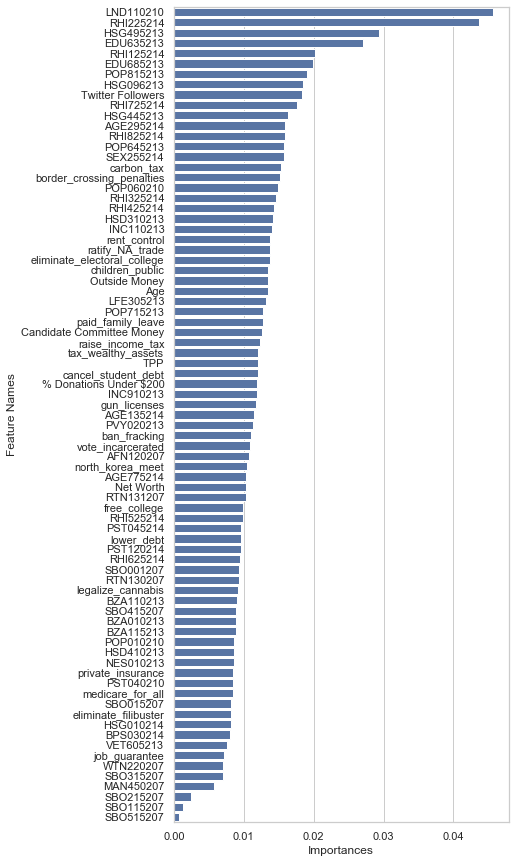

In [13]:
feature_importances = pd.DataFrame({"Feature Names": X.columns, "Importances": rfc.feature_importances_}).sort_values(by="Importances", ascending=False)

sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))
sns.barplot(x="Importances", y="Feature Names", data=feature_importances,
            label="Total", color="b")

### Isolate big tuesday states for prediction
* isolating from the results data because we want the results for these states for comparison to our predictions

In [14]:
big_tuesday = data[~data['state'].isin(training_states)]

big_tuesday

last name  votes state  winner  percent_votes  winner_state   fips  \
260      Biden    653    ID       1       0.620722             1  16085   
261      Biden   1505    ID       1       0.558856             1  16083   
262      Biden    613    ID       0       0.471538             1  16081   
263      Biden    577    ID       1       0.640400             1  16079   
264      Biden    166    ID       1       0.621723             1  16077   
...        ...    ...   ...     ...            ...           ...    ...   
3185   Sanders   4075    WA       0       0.462963             0  53007   
3186   Sanders   6911    WA       0       0.448330             0  53005   
3187   Sanders    705    WA       0       0.386725             0  53003   
3188   Sanders    288    WA       1       0.503497             0  53001   
3189   Sanders   7682    ND       1       0.572259             1  38000   

                 county  PST045214  PST040210  ...  carbon_tax  \
260       Valley County       9826       9862  ...         1.0   
261   Twin Falls County      80914      77230  ...         1.0   
262        Teton County      10341      10170  ...         1.0   
263     Shoshone County      12390      12765  ...         1.0   
264        Power County       7617       7817  ...         1.0   
...                 ...        ...        ...  ...         ...   
3185      Chelan County      74588      72456  ...         0.0   
3186      Benton County     186486     175177  ...         0.0   
3187      Asotin County      22189      21623  ...         0.0   
3188       Adams County      19179      18728  ...         0.0   
3189       North Dakota     739482     672591  ...         0.0   

      north_korea_meet  free_college  children_public  ban_fracking  \
260                0.0           0.0              0.0           0.0   
261                0.0           0.0              0.0           0.0   
262                0.0           0.0              0.0           0.0   
263                0.0           0.0              0.0           0.0   
264                0.0           0.0              0.0           0.0   
...                ...           ...              ...           ...   
3185               1.0           1.0              1.0           1.0   
3186               1.0           1.0              1.0           1.0   
3187               1.0           1.0              1.0           1.0   
3188               1.0           1.0              1.0           1.0   
3189               1.0           1.0              1.0           1.0   

      border_crossing_penalties  medicare_for_all  private_insurance  \
260                         1.0               0.0                0.0   
261                         1.0               0.0                0.0   
262                         1.0               0.0                0.0   
263                         1.0               0.0                0.0   
264                         1.0               0.0                0.0   
...                         ...               ...                ...   
3185                        0.0               1.0                1.0   
3186                        0.0               1.0                1.0   
3187                        0.0               1.0                1.0   
3188                        0.0               1.0                1.0   
3189                        0.0               1.0                1.0   

      eliminate_electoral_college  eliminate_filibuster  
260                           0.0                   0.0  
261                           0.0                   0.0  
262                           0.0                   0.0  
263                           0.0                   0.0  
264                           0.0                   0.0  
...                           ...                   ...  
3185                          1.0                   1.0  
3186                          1.0                   1.0  
3187                          1.0                   1.0  
3188         

### Isolate future states for prediction
* have to pull these from predictions.csv (created from the county facts file) since our results data does not include these states

In [17]:
future_states = pd.read_csv('predictions.csv', delimiter='\t')

# filter out training states
future_states = future_states[~future_states['state_abbreviation'].isin(training_states)]

# filter out states already in the big_tuesday dataframe above
future_states = future_states[~future_states['state_abbreviation'].isin(big_tuesday['state'])]

# drop and rename columns
future_states.drop(['state'], axis=1, inplace=True)
future_states.rename(columns={'state_abbreviation': 'state', 'candidate': 'last name'}, inplace=True)

# add columns to match the big_tuesday dataframe
future_states['votes'], future_states['winner'], future_states['percent_votes'], future_states['winner_state'] = [0, -1, 0, -1]

future_states

state    county   fips last name  PST045214  PST040210  PST120214  \
134     AZ    Apache   4001   Sanders      71828      71518        0.4   
135     AZ    Apache   4001     Biden      71828      71518        0.4   
136     AZ   Cochise   4003   Sanders     127448     131357       -3.0   
137     AZ   Cochise   4003     Biden     127448     131357       -3.0   
138     AZ  Coconino   4005   Sanders     137682     134437        2.4   
...    ...       ...    ...       ...        ...        ...        ...   
5445    WY     Uinta  56041     Biden      20904      21118       -1.0   
5446    WY  Washakie  56043   Sanders       8322       8533       -2.5   
5447    WY  Washakie  56043     Biden       8322       8533       -2.5   
5448    WY    Weston  56045   Sanders       7201       7208       -0.1   
5449    WY    Weston  56045     Biden       7201       7208       -0.1   

      POP010210  AGE135214  AGE295214  ...  ban_fracking  \
134       71518        7.6       29.3  ...             1   
135       71518        7.6       29.3  ...             0   
136      131346        6.5       22.4  ...             1   
137      131346        6.5       22.4  ...             0   
138      134421        6.1       21.8  ...             1   
...         ...        ...        ...  ...           ...   
5445      21118        7.6       29.8  ...             0   
5446       8533        5.5       23.9  ...             1   
5447       8533        5.5       23.9  ...             0   
5448       7208        6.5       21.6  ...             1   
5449       7208        6.5       21.6  ...             0   

      border_crossing_penalties  medicare_for_all  private_insurance  \
134                           0                 1                  1   
135                           1                 0                  0   
136                           0                 1                  1   
137                           1                 0                  0   
138                           0                 1                  1   
...                         ...               ...                ...   
5445                          1                 0                  0   
5446                          0                 1                  1   
5447                          1                 0                  0   
5448                          0                 1                  1   
5449                          1                 0                  0   

      eliminate_electoral_college  eliminate_filibuster  votes  winner  \
134                             1                     1      0      -1   
135                             0                     0      0      -1   
136                             1                     1      0      -1   
137                             0                     0      0      -1   
138                             1                     1      0      -1   
...                           ...                   ...    ...     ...   
5445                            0                     0      0      -1   
5446                            1                     1      0      -1   
5447                            0                     0      0      -1   
5448                            1                     1      0      -1   
5449                            0                     0      0      -1   

      percent_votes  winner_state  
134               0            -1  
135               0            -1  
136               0            -1  
137               0            -1  
138               0            -1  
...             ...           ...  
5445              0            -1  
5446              0            -1  
5447              0            -1  
5448              0            -1  
5449              0            -1  

[2512 rows x 88 columns]

### Merge to create final dataframe for predictions

In [18]:
predictions = big_tuesday.append(future_states, sort=False)

predictions_for_model = predictions.drop(['state', 'votes', 'percent_votes', 'winner', 'last name', 'winner_state', 'fips', 'county', 'Gender'], axis=1)

predictions_for_model

PST045214  PST040210  PST120214  POP010210  AGE135214  AGE295214  \
260        9826       9862       -0.4       9862        4.3       18.3   
261       80914      77230        4.8      77230        7.7       27.6   
262       10341      10170        1.7      10170        7.8       27.8   
263       12390      12765       -2.9      12765        5.2       19.7   
264        7617       7817       -2.6       7817        9.9       30.5   
...         ...        ...        ...        ...        ...        ...   
5445      20904      21118       -1.0      21118        7.6       29.8   
5446       8322       8533       -2.5       8533        5.5       23.9   
5447       8322       8533       -2.5       8533        5.5       23.9   
5448       7201       7208       -0.1       7208        6.5       21.6   
5449       7201       7208       -0.1       7208        6.5       21.6   

      AGE775214  SEX255214  RHI125214  RHI225214  ...  carbon_tax  \
260        21.6       48.1       96.5        0.2  ...         1.0   
261        14.8       50.7       94.5        0.7  ...         1.0   
262         8.6       48.2       97.0        0.4  ...         1.0   
263        21.7       49.5       94.9        0.3  ...         1.0   
264        13.9       49.1       92.9        1.0  ...         1.0   
...         ...        ...        ...        ...  ...         ...   
5445       11.0       49.6       95.4        0.9  ...         1.0   
5446       20.1       49.3       94.8        0.8  ...         0.0   
5447       20.1       49.3       94.8        0.8  ...         1.0   
5448       18.1       47.4       95.0        0.7  ...         0.0   
5449       18.1       47.4       95.0        0.7  ...         1.0   

      north_korea_meet  free_college  children_public  ban_fracking  \
260                0.0           0.0              0.0           0.0   
261                0.0           0.0              0.0           0.0   
262                0.0           0.0              0.0           0.0   
263                0.0           0.0              0.0           0.0   
264                0.0           0.0              0.0           0.0   
...                ...           ...              ...           ...   
5445               0.0           0.0              0.0           0.0   
5446               1.0           1.0              1.0           1.0   
5447               0.0           0.0              0.0           0.0   
5448               1.0           1.0              1.0           1.0   
5449               0.0           0.0              0.0           0.0   

      border_crossing_penalties  medicare_for_all  private_insurance  \
260                         1.0               0.0                0.0   
261                         1.0               0.0                0.0   
262                         1.0               0.0                0.0   
263                         1.0               0.0                0.0   
264                         1.0               0.0                0.0   
...                         ...               ...                ...   
5445                        1.0               0.0                0.0   
5446                        0.0               1.0                1.0   
5447                        1.0               0.0                0.0   
5448                        0.0               1.0                1.0   
5449                        1.0               0.0                0.0   

      eliminate_electoral_college  eliminate_filibuster  
260                           0.0                   0.0  
261                           0.0                   0.0  
262                           0.0                   0.0  
263                           0.0                   0.0  
264                           0.0                   0.0  
...                           ...                   ...  
5445                          0.0                   0.0  
5446                          1.0                   1.0  
5447                          0.0               

### State predictions for big tuesday and beyond

In [19]:
predictions_BT = rfc.predict(predictions_for_model)

predictions['predicted_winner'] = predictions_BT

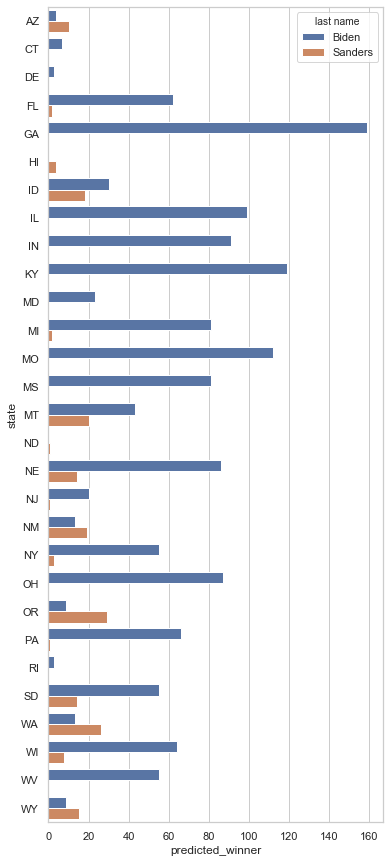

In [20]:
winner_plot = predictions.groupby(['last name', 'state'])['predicted_winner'].sum().reset_index()

f, ax = plt.subplots(figsize=(6, 15))
sns.barplot(x="predicted_winner", y = 'state', data = winner_plot, hue = 'last name')

### Add state winner column to prediction

In [21]:
def add_state_winner(big_tuesday):
    
    big_tuesday_state = pd.DataFrame()
    
    for index,row in big_tuesday[['state']].drop_duplicates().iterrows():
    
        # filter for unique state
        filtered_df = big_tuesday[big_tuesday['state'] == row['state']]

        winner = []

        biden_sum = filtered_df[filtered_df['last name'] == 'Biden']['predicted_winner'].sum()
        sanders_sum = filtered_df[filtered_df['last name'] == 'Sanders']['predicted_winner'].sum()

        for index,row in filtered_df.iterrows():
            if row['last name'] == 'Biden':
                if biden_sum > sanders_sum:
                    winner.append(1)
                else:
                    winner.append(0)    
            else:
                if biden_sum > sanders_sum:
                    winner.append(0)
                else:
                    winner.append(1)

        filtered_df['predicted_winner_state'] = winner

        big_tuesday_state = big_tuesday_state.append(filtered_df)
    
    # Add column tagging these counties as being used in the model
    big_tuesday_state['used_in_model'] = 0
    
    return big_tuesday_state

big_tuesday_state = add_state_winner(predictions)

big_tuesday_state

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


last name  votes state  winner  percent_votes  winner_state   fips  \
260      Biden    653    ID       1       0.620722             1  16085   
261      Biden   1505    ID       1       0.558856             1  16083   
262      Biden    613    ID       0       0.471538             1  16081   
263      Biden    577    ID       1       0.640400             1  16079   
264      Biden    166    ID       1       0.621723             1  16077   
...        ...    ...   ...     ...            ...           ...    ...   
5445     Biden      0    WY      -1       0.000000            -1  56041   
5446   Sanders      0    WY      -1       0.000000            -1  56043   
5447     Biden      0    WY      -1       0.000000            -1  56043   
5448   Sanders      0    WY      -1       0.000000            -1  56045   
5449     Biden      0    WY      -1       0.000000            -1  56045   

                 county  PST045214  PST040210  ...  children_public  \
260       Valley County       9826       9862  ...              0.0   
261   Twin Falls County      80914      77230  ...              0.0   
262        Teton County      10341      10170  ...              0.0   
263     Shoshone County      12390      12765  ...              0.0   
264        Power County       7617       7817  ...              0.0   
...                 ...        ...        ...  ...              ...   
5445              Uinta      20904      21118  ...              0.0   
5446           Washakie       8322       8533  ...              1.0   
5447           Washakie       8322       8533  ...              0.0   
5448             Weston       7201       7208  ...              1.0   
5449             Weston       7201       7208  ...              0.0   

      ban_fracking  border_crossing_penalties  medicare_for_all  \
260            0.0                        1.0               0.0   
261            0.0                        1.0               0.0   
262            0.0                        1.0               0.0   
263            0.0                        1.0               0.0   
264            0.0                        1.0               0.0   
...            ...                        ...               ...   
5445           0.0                        1.0               0.0   
5446           1.0                        0.0               1.0   
5447           0.0                        1.0               0.0   
5448           1.0                        0.0               1.0   
5449           0.0                        1.0               0.0   

      private_insurance  eliminate_electoral_college  eliminate_filibuster  \
260                 0.0                          0.0                   0.0   
261                 0.0                          0.0                   0.0   
262                 0.0                          0.0                   0.0   
263                 0.0                          0.0                   0.0   
264                 0.0                          0.0                   0.0   
...                 ...                          ...                   ...   
5445                0.0                          0.0                   0.0   
5446                1.0                          1.0                   1.0   
5447                0.0                          0.0                   0.0   
5448                1.0                          1.0                   1.0   
5449                0.0                          0.0                   0.0   

      predicted_winner  predicted_winner_state  used_in_model  
260                  0                       1              0  
261                  0                       1              0  
262                  1                       1              0  
263                  1                       1              0  
264                  1                       1              0  
...                ...                     ...            ...  
5445                 0                       0              0

### Append prediction states to training states
* This creates a dataframe that includes all the states we used for prediction, plus all the states that were used in training

In [22]:
training_states_df = data[data['state'].isin(training_states)]
training_states_df['used_in_model'] = 1
training_states_df['predicted_winner'] = -1
training_states_df['predicted_winner_state'] = -1

merged = big_tuesday_state.append(training_states_df)

merged

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

% Donations Under $200  AFN120207  AGE135214  AGE295214  AGE775214  Age  \
260                   0.3624      43204        4.3       18.3       21.6   77   
261                   0.3624     112044        7.7       27.6       14.8   77   
262                   0.3624      10730        7.8       27.8        8.6   77   
263                   0.3624      11068        5.2       19.7       21.7   77   
264                   0.3624       2596        9.9       30.5       13.9   77   
...                      ...        ...        ...        ...        ...  ...   
3146                  0.5576       3834        5.3       21.1       18.2   78   
3147                  0.5576      11029        4.3       19.1       24.3   78   
3148                  0.5576     471725        7.5       17.8       10.1   78   
3149                  0.5576     120194        5.5       21.0       16.5   78   
3150                  0.5576      48144        6.0       20.9       21.3   78   

      BPS030214  BZA010213  BZA110213  BZA115213  ...  raise_income_tax  \
260          99        567       2927        1.4  ...               0.0   
261         361       2455      27449        8.0  ...               0.0   
262          28        418       1882        5.1  ...               0.0   
263           7        355       4166       -0.4  ...               0.0   
264           8        150       2027       -3.1  ...               0.0   
...         ...        ...        ...        ...  ...               ...   
3146         40        258       1804       -2.7  ...               1.0   
3147         17        243       2471        1.6  ...               1.0   
3148       1324       4640      83411        0.1  ...               1.0   
3149        404       2569      37158        0.6  ...               1.0   
3150         67        760       8779       -0.6  ...               1.0   

      ratify_NA_trade  rent_control state  tax_wealthy_assets  used_in_model  \
260               1.0           0.0    ID                 0.0              0   
261               1.0           0.0    ID                 0.0              0   
262               1.0           0.0    ID                 0.0              0   
263               1.0           0.0    ID                 0.0              0   
264               1.0           0.0    ID                 0.0              0   
...               ...           ...   ...                 ...            ...   
3146              0.0           1.0    VA                 1.0              1   
3147              0.0           1.0    VA                 1.0              1   
3148              0.0           1.0    VA                 1.0              1   
3149              0.0           1.0    VA                 1.0              1   
3150              0.0           1.0    VA                 1.0              1   

      vote_incarcerated  votes  winner  winner_state  
260                 0.0    653       1             1  
261                 0.0   1505       1             1  
262                 0.0    613       0             1  
263                 0.0    577       1             1  
264                 0.0    166       1             1  
...                 ...    ...     ...           ...  
3146                1.0    171       0             0  
3147                1.0    234       0             0  
3148                1.0   7586       0             0  
3149                1.0   6315       0             0  
3150                1.0    598       0             0  

[5702 rows x 91 columns]

### Save prediction

In [23]:
merged.to_csv('predictions/rfc_bigtuesday_allfeat.csv', index=False)

## Removing features
* Repeat big tuesday predictions after removing features with low importance and high correlation
* SBO515207: Native Hawaiian- and Other Pacific Islander-owned firms, percent, 2007
* SBO115207: American Indian- and Alaska Native-owned firms, percent, 2007
* SBO215207: Asian-owned firms, percent, 2007
* MAN450207: Manufacturers shipments, 2007 ($1,000)

* PST045214, PST040210, POP010210, BZA010213, BZA110213, HSD410213, NES010213, VET605213, HSG010214: high corr

* SBO315207, ratify_NA_trade, Age: Low importance after removing high corr. features

### Most of the code below is just copied from above

In [33]:
training_data = data.drop(['Gender','last name', 'fips', 'county', 'winner_state', 
                           'SBO515207', 
                           'SBO115207', 
                           'SBO215207', 
                           'MAN450207',
                            'PST045214',
                          'PST040210',
                          'POP010210',
                          'BZA010213',
                          'BZA110213',
                          'HSD410213',
                          'NES010213',
                          'VET605213',
                          'HSG010214',
                          'SBO315207',
                          'ratify_NA_trade',
                          'Age',
                          'eliminate_filibuster'], axis=1)

In [34]:
training_data.columns

Index(['votes', 'state', 'winner', 'percent_votes', 'PST120214', 'AGE135214',
       'AGE295214', 'AGE775214', 'SEX255214', 'RHI125214', 'RHI225214',
       'RHI325214', 'RHI425214', 'RHI525214', 'RHI625214', 'RHI725214',
       'RHI825214', 'POP715213', 'POP645213', 'POP815213', 'EDU635213',
       'EDU685213', 'LFE305213', 'HSG445213', 'HSG096213', 'HSG495213',
       'HSD310213', 'INC910213', 'INC110213', 'PVY020213', 'BZA115213',
       'SBO001207', 'SBO415207', 'SBO015207', 'WTN220207', 'RTN130207',
       'RTN131207', 'AFN120207', 'BPS030214', 'LND110210', 'POP060210',
       'Net Worth', '% Donations Under $200', 'Candidate Committee Money',
       'Outside Money', 'Twitter Followers', 'legalize_cannabis',
       'vote_incarcerated', 'gun_licenses', 'tax_wealthy_assets',
       'paid_family_leave', 'job_guarantee', 'cancel_student_debt',
       'raise_income_tax', 'rent_control', 'lower_debt', 'TPP', 'carbon_tax',
       'north_korea_meet', 'free_college', 'children_public', 'ba

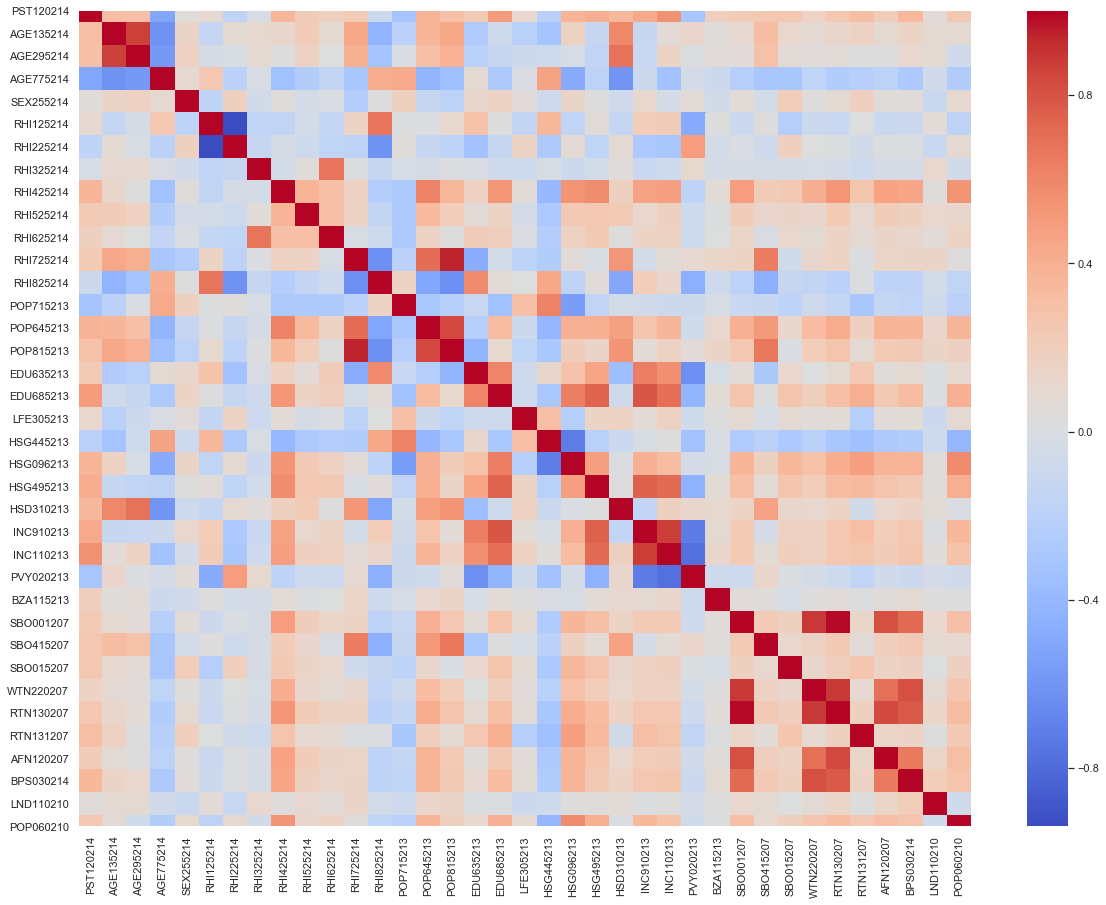

In [35]:
plt.figure(figsize=(20,15))

sns.heatmap(training_data[['PST120214', 'AGE135214',
       'AGE295214', 'AGE775214', 'SEX255214', 'RHI125214', 'RHI225214',
       'RHI325214', 'RHI425214', 'RHI525214', 'RHI625214', 'RHI725214',
       'RHI825214', 'POP715213', 'POP645213', 'POP815213', 'EDU635213',
       'EDU685213', 'LFE305213', 'HSG445213', 'HSG096213', 'HSG495213',
       'HSD310213', 'INC910213', 'INC110213', 'PVY020213', 'BZA115213',
       'SBO001207', 'SBO415207', 'SBO015207', 'WTN220207', 'RTN130207',
       'RTN131207', 'AFN120207', 'BPS030214', 'LND110210', 'POP060210']].corr(), cmap='coolwarm')

In [36]:
training_states = ['IA', 'NH', 'NV', 'SC', 'AL', 'AR', 'CA', 'CO', 'ME', 'MA', 'MN', 'NC', 'OK', 'TN', 'TX', 'UT', 'VT', 'VA']

training_data_BT = training_data[training_data['state'].isin(training_states)]

training_data_BT.drop(['state', 'votes', 'percent_votes'], axis=1, inplace=True)

X = training_data_BT.drop('winner',axis=1)
y = training_data_BT['winner']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [37]:
predictions = rfc.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[260  47]
 [ 36 275]]


              precision    recall  f1-score   support

           0       0.88      0.85      0.86       307
           1       0.85      0.88      0.87       311

    accuracy                           0.87       618
   macro avg       0.87      0.87      0.87       618
weighted avg       0.87      0.87      0.87       618



In [38]:
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), X.columns), 
             reverse=True))


Features sorted by their score:
[(0.0497, 'RHI225214'), (0.0496, 'LND110210'), (0.0325, 'HSG495213'), (0.0308, 'EDU635213'), (0.0226, 'RHI125214'), (0.0213, 'EDU685213'), (0.0212, 'RHI725214'), (0.021, 'POP815213'), (0.0206, 'HSG096213'), (0.0205, 'HSG445213'), (0.0195, 'POP645213'), (0.0187, 'POP060210'), (0.0182, 'AGE295214'), (0.018, 'RHI825214'), (0.0178, 'SEX255214'), (0.0177, 'eliminate_electoral_college'), (0.0175, 'cancel_student_debt'), (0.0169, 'INC110213'), (0.0166, 'job_guarantee'), (0.0165, 'RHI425214'), (0.0162, 'Net Worth'), (0.0159, 'LFE305213'), (0.0159, 'HSD310213'), (0.0156, 'RHI325214'), (0.0153, 'legalize_cannabis'), (0.0152, 'POP715213'), (0.0151, 'paid_family_leave'), (0.0151, 'TPP'), (0.0146, 'lower_debt'), (0.0144, 'INC910213'), (0.0144, 'Candidate Committee Money'), (0.014, 'Outside Money'), (0.0136, 'children_public'), (0.0136, 'AFN120207'), (0.0135, '% Donations Under $200'), (0.0134, 'private_insurance'), (0.0132, 'RTN131207'), (0.0131, 'north_korea_meet'),

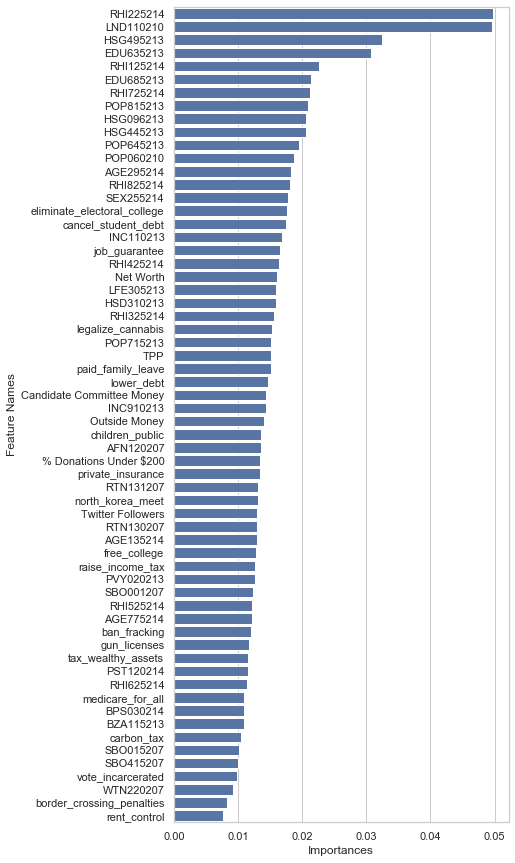

In [39]:
feature_importances = pd.DataFrame({"Feature Names": X.columns, "Importances": rfc.feature_importances_}).sort_values(by="Importances", ascending=False)

sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))
sns.barplot(x="Importances", y="Feature Names", data=feature_importances,
            label="Total", color="b")

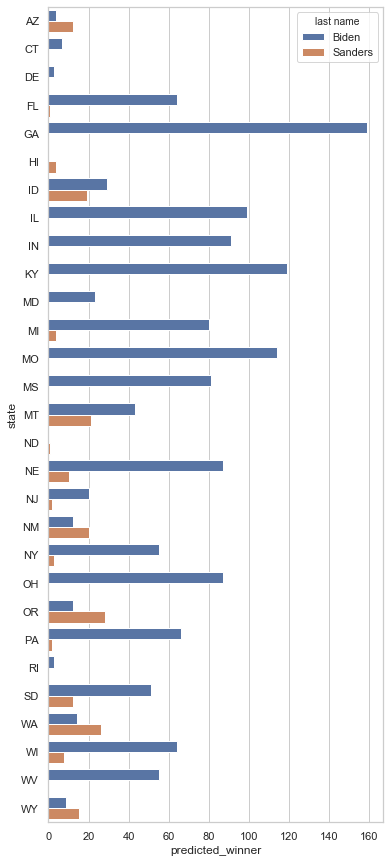

In [41]:
big_tuesday = data[~data['state'].isin(training_states)]

future_states = pd.read_csv('predictions.csv', delimiter='\t')

# filter out training states
future_states = future_states[~future_states['state_abbreviation'].isin(training_states)]

# filter out states already in the big_tuesday dataframe above
future_states = future_states[~future_states['state_abbreviation'].isin(big_tuesday['state'])]

# drop and rename columns
future_states.drop(['state'], axis=1, inplace=True)
future_states.rename(columns={'state_abbreviation': 'state', 'candidate': 'last name'}, inplace=True)

# add columns to match the big_tuesday dataframe
future_states['votes'], future_states['winner'], future_states['percent_votes'], future_states['winner_state'] = [0, -1, 0, -1]

predictions = big_tuesday.append(future_states, sort=False)

predictions_for_model = predictions.drop(['state', 'votes', 'percent_votes', 'winner', 'last name', 'winner_state', 'fips', 'county', 'Gender', 'SBO515207', 
                           'SBO115207', 
                           'SBO215207', 
                           'MAN450207',
                            'PST045214',
                          'PST040210',
                          'POP010210',
                          'BZA010213',
                          'BZA110213',
                          'HSD410213',
                          'NES010213',
                          'VET605213',
                          'HSG010214',
                          'SBO315207',
                          'ratify_NA_trade',
                          'Age',
                          'eliminate_filibuster'], axis=1)

predictions_BT = rfc.predict(predictions_for_model)

predictions['predicted_winner'] = predictions_BT

winner_plot = predictions.groupby(['last name', 'state'])['predicted_winner'].sum().reset_index()

f, ax = plt.subplots(figsize=(6, 15))
sns.barplot(x="predicted_winner", y = 'state', data = winner_plot, hue = 'last name')

In [43]:
big_tuesday_state = add_state_winner(predictions)

training_states_df = data[data['state'].isin(training_states)]
training_states_df['used_in_model'] = 1
training_states_df['predicted_winner'] = -1
training_states_df['predicted_winner_state'] = -1

merged = big_tuesday_state.append(training_states_df)

merged.to_csv('predictions/rfc_bigtuesday_pruned.csv', index=False)

merged

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

% Donations Under $200  AFN120207  AGE135214  AGE295214  AGE775214  Age  \
260                   0.3624      43204        4.3       18.3       21.6   77   
261                   0.3624     112044        7.7       27.6       14.8   77   
262                   0.3624      10730        7.8       27.8        8.6   77   
263                   0.3624      11068        5.2       19.7       21.7   77   
264                   0.3624       2596        9.9       30.5       13.9   77   
...                      ...        ...        ...        ...        ...  ...   
3146                  0.5576       3834        5.3       21.1       18.2   78   
3147                  0.5576      11029        4.3       19.1       24.3   78   
3148                  0.5576     471725        7.5       17.8       10.1   78   
3149                  0.5576     120194        5.5       21.0       16.5   78   
3150                  0.5576      48144        6.0       20.9       21.3   78   

      BPS030214  BZA010213  BZA110213  BZA115213  ...  raise_income_tax  \
260          99        567       2927        1.4  ...               0.0   
261         361       2455      27449        8.0  ...               0.0   
262          28        418       1882        5.1  ...               0.0   
263           7        355       4166       -0.4  ...               0.0   
264           8        150       2027       -3.1  ...               0.0   
...         ...        ...        ...        ...  ...               ...   
3146         40        258       1804       -2.7  ...               1.0   
3147         17        243       2471        1.6  ...               1.0   
3148       1324       4640      83411        0.1  ...               1.0   
3149        404       2569      37158        0.6  ...               1.0   
3150         67        760       8779       -0.6  ...               1.0   

      ratify_NA_trade  rent_control state  tax_wealthy_assets  used_in_model  \
260               1.0           0.0    ID                 0.0              0   
261               1.0           0.0    ID                 0.0              0   
262               1.0           0.0    ID                 0.0              0   
263               1.0           0.0    ID                 0.0              0   
264               1.0           0.0    ID                 0.0              0   
...               ...           ...   ...                 ...            ...   
3146              0.0           1.0    VA                 1.0              1   
3147              0.0           1.0    VA                 1.0              1   
3148              0.0           1.0    VA                 1.0              1   
3149              0.0           1.0    VA                 1.0              1   
3150              0.0           1.0    VA                 1.0              1   

      vote_incarcerated  votes  winner  winner_state  
260                 0.0    653       1             1  
261                 0.0   1505       1             1  
262                 0.0    613       0             1  
263                 0.0    577       1             1  
264                 0.0    166       1             1  
...                 ...    ...     ...           ...  
3146                1.0    171       0             0  
3147                1.0    234       0             0  
3148                1.0   7586       0             0  
3149                1.0   6315       0             0  
3150                1.0    598       0             0  

[5702 rows x 91 columns]

# Tensorflow

## Big Tuesday

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=512, activation='relu', input_dim=79))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
big_tuesday_predict_scaled = X_scaler.transform(big_tuesday_predict)

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
model.fit(
    X_train_scaled,
    y_train,
    epochs=60,
    shuffle=True,
    verbose=2
)

In [ ]:
 model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
big_tuesday = data[data['state'].isin(big_tuesday_states)]

big_tuesday_predict = big_tuesday.drop(['state', 'votes', 'percent_votes', 'winner', 'last name', 'winner_state', 'fips', 'county', 'Gender'], axis=1)

predictions_BT = model.predict_classes(big_tuesday_predict_scaled)

big_tuesday['predicted_winner'] = predictions_BT

winner_plot = big_tuesday.groupby(['last name', 'state'])['predicted_winner'].sum().reset_index()

f, ax = plt.subplots(figsize=(6, 15))
sns.barplot(x="predicted_winner", y = 'state', data = winner_plot, hue = 'last name')